In [4]:
import sys
import scipy.optimize, scipy.special
from numpy import *

import pylab
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab

EX_DIRECTORY_PATH = './data/'


def plot( data ):
    negatives = data[data[:, 2] == 0]
    positives = data[data[:, 2] == 1]

    pyplot.xlabel("Microchip test 1")
    pyplot.ylabel("Microchip test 2")
    pyplot.xlim([-1.0, 1.5])
    pyplot.ylim([-1.0, 1.5])

    pyplot.scatter( negatives[:,0], negatives[:,1], c='y', marker='o', linewidths=1, s=40, label='y=0' )
    pyplot.scatter( positives[:,0], positives[:,1], c='k', marker='+', linewidths=2, s=40, label='y=1' )
    
    pyplot.legend()


def mapFeature( X1, X2 ):
    degrees = 6
    out = ones( (shape(X1)[0], 1) )
    
    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = X1 ** (i-j)
            term2 = X2 ** (j)
            term  = (term1 * term2).reshape( shape(term1)[0], 1 ) 
            out   = hstack(( out, term ))
    return out

def sigmoid( z ):
    return scipy.special.expit(z)
    # return 1.0 / (1.0 + exp( -z ))

def gradientCost( theta, X, y, lamda ):
    m    = shape( X )[0]
    grad = X.T.dot( sigmoid( X.dot( theta ) ) - y ) / m
    grad[1:] = grad[1:] + ( (theta[1:] * lamda ) / m )
    return grad

def computeCost( theta, X, y, lamda ):
    m          = shape( X )[0]
    hypo       = sigmoid( X.dot( theta ) )
    term1      = log( hypo ).dot( -y )
    term2      = log( 1.0 - hypo ).dot( 1 - y )
    left_hand  = (term1 - term2) / m
    right_hand = theta.transpose().dot( theta ) * lamda / (2*m)
    return left_hand + right_hand

def costFunction( theta, X, y, lamda ):
    cost      = computeCost( theta, X, y, lamda )
    gradient  = gradientCost( theta, X, y, lamda )
    return cost

def findMinTheta( theta, X, y, lamda ):
    result = scipy.optimize.minimize( costFunction, theta, args=(X, y, lamda),  method='BFGS', options={"maxiter":1000, "disp":True} )
    return result.x, result.fun

def part2_1():
    data  = genfromtxt( EX_DIRECTORY_PATH + "ex2data2.txt", delimiter = ',' )
    plot( data )
    pyplot.show()

def part2_2():
    data  = genfromtxt( EX_DIRECTORY_PATH + "ex2data2.txt", delimiter = ',' )
    X       = mapFeature( data[:, 0], data[:, 1] )
    print (X)

def part2_3():
    data  = genfromtxt( EX_DIRECTORY_PATH + "ex2data2.txt", delimiter = ',' )
    y       = data[:,2]
    X       = mapFeature( data[:, 0], data[:, 1] )
    theta = zeros( shape(X)[1] )
    lamda = 1.0
    print(computeCost( theta, X, y, lamda ))

    theta, cost = findMinTheta( theta, X, y, lamda )

def part2_4():
    data  = genfromtxt( EX_DIRECTORY_PATH + "ex2data2.txt", delimiter = ',' )
    y       = data[:,2]
    X       = mapFeature( data[:, 0], data[:, 1] )
    theta = zeros( shape(X)[1] )
    lamdas = [0.0,1.0,10,100]

    for lamda in lamdas:
        theta, cost = findMinTheta( theta, X, y, lamda )
        
        pyplot.text( 0.15, 1.3, 'Lamda %.1f' % lamda )
        plot( data )

        u = linspace( -1, 1.5, 50 )
        v = linspace( -1, 1.5, 50 )
        z = zeros( (len(u), len(v)) )

        for i in range(0, len(u)): 
            for j in range(0, len(v)):
                mapped = mapFeature( array([u[i]]), array([v[j]]) )
                z[i,j] = mapped.dot( theta )
        z = z.transpose()
        u, v = meshgrid(u, v)

        CS1 = pyplot.contour( u, v, z, [0])
        pyplot.clabel(CS1, CS1.levels, inline=True, fmt={0: 'DB'}, fontsize=10)
        pyplot.show()

In [5]:
def main():
    set_printoptions(precision=6, linewidth=200)

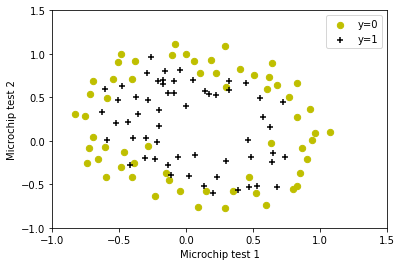

In [6]:
    part2_1()

In [7]:
    part2_2()

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


In [8]:
    part2_3()

0.6931471805599453
Optimization terminated successfully.
         Current function value: 0.535160
         Iterations: 46
         Function evaluations: 1410
         Gradient evaluations: 47


Optimization terminated successfully.
         Current function value: 0.227449
         Iterations: 689
         Function evaluations: 21870
         Gradient evaluations: 729


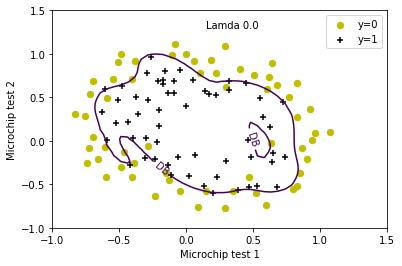

Optimization terminated successfully.
         Current function value: 0.535160
         Iterations: 49
         Function evaluations: 1650
         Gradient evaluations: 55


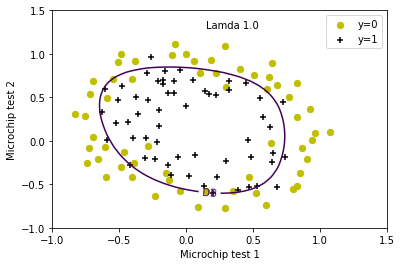

Optimization terminated successfully.
         Current function value: 0.651183
         Iterations: 18
         Function evaluations: 600
         Gradient evaluations: 20


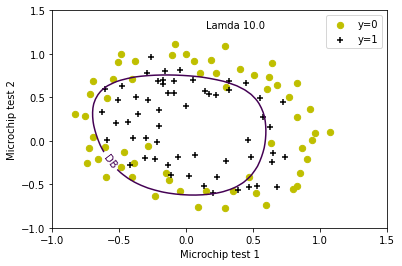

Optimization terminated successfully.
         Current function value: 0.686527
         Iterations: 5
         Function evaluations: 180
         Gradient evaluations: 6


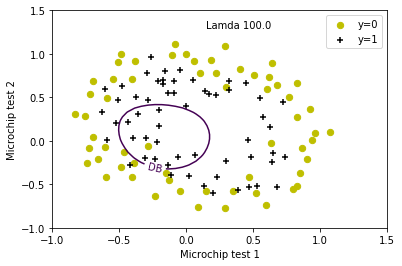

In [9]:
    part2_4()

In [10]:
if __name__ == '__main__':
    main()